In [2]:
import pandas as pd
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [28]:
stat22 = pitching_stats(2022,qual=20)
stat23 = pitching_stats(2023,qual=10)
stat24 = pitching_stats(2024,qual=10)

In [29]:
def reformat_name(name):
    parts = name.split()
    if len(parts) == 3:
        first, middle, last = parts
        return f"{middle} {last}, {first}"
    if len(parts) == 2:
        first, last = parts
        return f"{last}, {first}"
    

stat22['Name'] = stat22['Name'].apply(reformat_name)
stat23['Name'] = stat23['Name'].apply(reformat_name)
stat24['Name'] = stat24['Name'].apply(reformat_name)

stat22 = stat22.rename(columns={
    'Name': 'player_name'
})

stat23 = stat23.rename(columns={
    'Name': 'player_name'
})

stat24 = stat24.rename(columns={
    'Name': 'player_name'
})

In [47]:
scores = pd.read_csv("pitch_scores.csv")

#scores = pd.read_csv("pitch_scores.csv")

joined_data_22 = stat22.merge(scores,how='left',on='player_name')
joined_data_23 = stat23.merge(scores,how='left',on='player_name')
joined_data_24 = stat24.merge(scores,how='left',on='player_name')
joined_data_24

,IDfg,Season,player_name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FO,overall,fastball,sinker,cutter,slider,sweeper,curveball,changeup,splitter
0,19879,2024,"Houck, Tanner",BOS,28,7,5,3.3,2.14,15,...,NaN,100.24,96.97,101.32,99.63,101.42,0.00,0.00,0.00,96.84
1,27463,2024,"Crochet, Garrett",CHW,25,6,6,2.9,3.25,16,...,NaN,100.57,98.78,0.00,0.00,103.88,0.00,0.00,102.83,0.00
2,17277,2024,"Suarez, Ranger",PHI,28,10,1,2.8,1.75,15,...,NaN,98.71,96.38,101.77,101.67,102.61,0.00,99.50,93.88,0.00
3,10603,2024,"Sale, Chris",ATL,35,9,2,2.6,2.98,13,...,NaN,93.96,94.88,105.82,0.00,91.97,0.00,0.00,90.96,0.00
4,14374,2024,"Glasnow, Tyler",LAD,30,7,5,2.6,3.00,15,...,NaN,103.74,109.86,99.86,0.00,98.33,0.00,100.07,86.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,21537,2024,"Lynch, Daniel",KCR,27,0,0,-0.6,6.35,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,25311,2024,"Munoz, Roddery",MIA,24,1,2,-0.7,5.76,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,11804,2024,"Neris, Hector",CHC,35,6,2,-0.8,4.73,28,...,NaN,98.84,97.80,97.57,0.00,99.69,0.00,0.00,0.00,101.17
491,17859,2024,"Alzolay, Adbert",CHC,29,1,4,-0.8,4.67,18,...,NaN,100.01,97.83,98.52,101.44,101.28,100.55,0.00,98.05,0.00


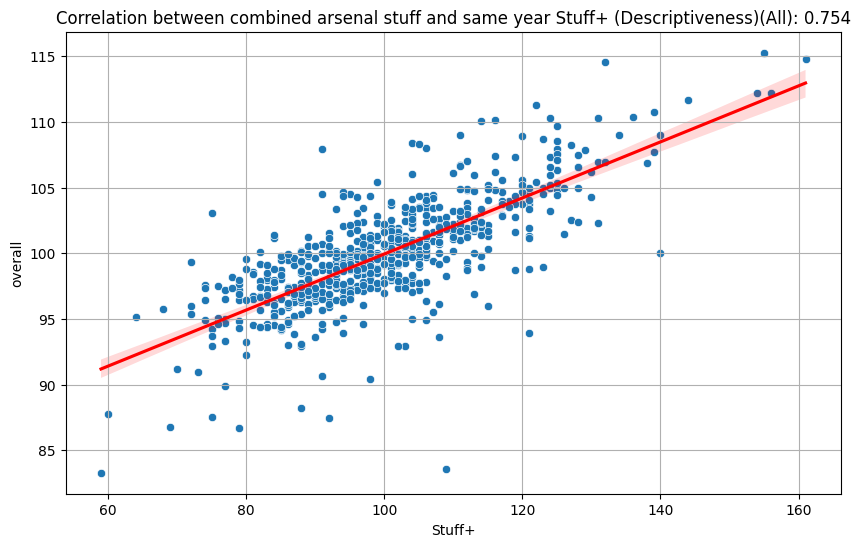

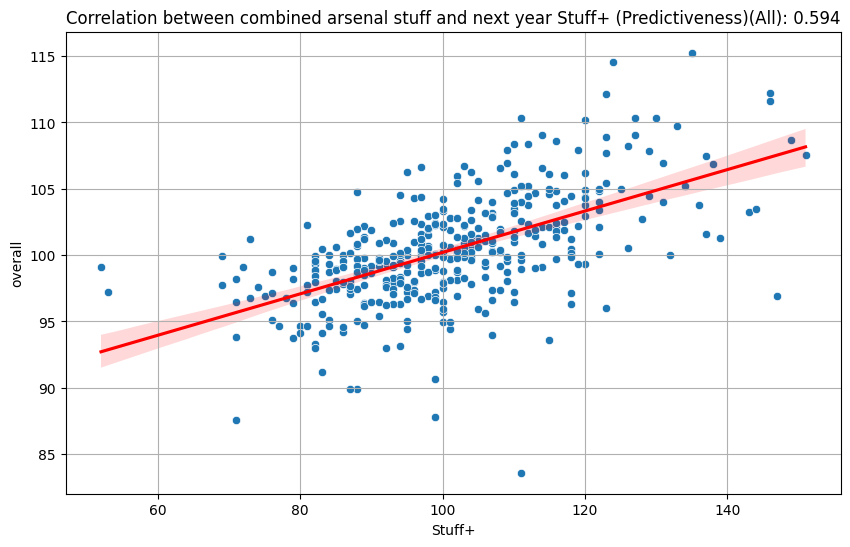

In [51]:
def filter_pitch(df, pitch):
    return df[df[pitch] > 0]

# Variables for analysis
stat = 'Stuff+'
pitch = 'overall'

# Filter data
filtered_data_22 = filter_pitch(joined_data_22, pitch)
filtered_data_23 = filter_pitch(joined_data_23, pitch)
filtered_data_24 = filter_pitch(joined_data_24, pitch)

# Calculate correlations
correlation_23 = filtered_data_23[stat].corr(filtered_data_23[pitch])
correlation_24 = filtered_data_24[stat].corr(filtered_data_24[pitch])


# Plot descriptive correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_23)
sns.regplot(x=stat, y=pitch, data=filtered_data_23, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and same year Stuff+ (Descriptiveness)(All): {correlation_23:.3f}")
plt.grid(True)
plt.savefig('descriptive.png')

# Plot predictive correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data_24)
sns.regplot(x=stat, y=pitch, data=filtered_data_24, scatter=False, color='red')
plt.title(f"Correlation between combined arsenal stuff and next year Stuff+ (Predictiveness)(All): {correlation_24:.3f}")
plt.grid(True)
plt.savefig('predictive.png')

In [52]:
# Variables for analysis
stat = 'Stuff+'
pitch = 'overall'

# Filter data
filtered_data_23 = filter_pitch(joined_data_23, pitch)
filtered_data_24 = filter_pitch(joined_data_24, pitch)

# Perform Linear Regression for descriptive model (same year)
X_23 = filtered_data_23[pitch].values.reshape(-1, 1)
y_23 = filtered_data_23[stat].values
model_23 = LinearRegression()
model_23.fit(X_23, y_23)
r_23 = model_23.score(X_23,y_23)

# Perform Linear Regression for predictive model (next year)
X_24 = filtered_data_24[pitch].values.reshape(-1, 1)
y_24 = filtered_data_24[stat].values
model_24 = LinearRegression()
model_24.fit(X_24, y_24)
r_24 = model_24.score(X_24,y_24)

print("2023")
print(r_23)
print("2024")
print(r_24)



2023
0.5683988870799586
2024
0.3523481918156508
